In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import (load_data, print_dataset_info, split_dataset, 
                              auto_scatter_simple,load_dataset,detect_outliers,
                              one_hot_dataframe)
from scipy.stats  import boxcox
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

pd.set_option('display.width', 140)
pd.set_option('precision', 4)

sns.set_style("whitegrid")

sns.set_palette(sns.color_palette("Set2", 15))

In [2]:
input_file  = r'./data/cal_housing.data'
RESPONSE ='median_house_value'
train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(input_file,RESPONSE)

 input file is :./data/cal_housing.data loaded.
Continous Variables
['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
No categorical variables


In [3]:
train_dataset.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,-119.5697,35.6319,28.6395,2635.7631,537.8980,1425.4767,499.5397,3.8707,206855.8169
std,2.0035,2.1360,12.5856,2181.6153,421.2479,1132.4621,382.3298,1.8998,115395.6159
min,-124.3500,32.5400,1.0000,2.0000,1.0000,3.0000,1.0000,0.4999,14999.0000
25%,-121.8000,33.9300,18.0000,1447.7500,295.0000,787.0000,280.0000,2.5634,119600.0000
50%,-118.4900,34.2600,29.0000,2127.0000,435.0000,1166.0000,409.0000,3.5348,179700.0000
75%,-118.0100,37.7100,37.0000,3148.0000,647.0000,1725.0000,605.0000,4.7432,264725.0000
max,-114.3100,41.9500,52.0000,39320.0000,6445.0000,35682.0000,6082.0000,15.0001,500001.0000


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
latitude              20640 non-null float64
longitude             20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


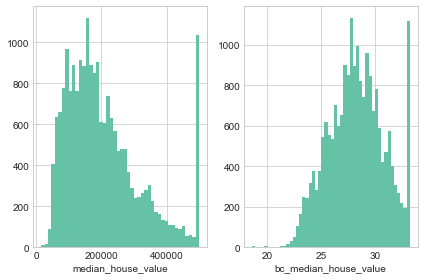

In [5]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(1,2, 1)
ax2 = fig.add_subplot(1,2, 2)
bc_median_house_value,median_house_value_lambda  = boxcox(train_dataset['median_house_value'])
train_dataset['bc_median_house_value'] =bc_median_house_value
sns.distplot(train_dataset[response_column[0]],ax=ax1 ,kde =False,hist_kws=dict(alpha=1))
sns.distplot(train_dataset['bc_median_house_value'],ax=ax2 ,kde =False,hist_kws=dict(alpha=1))
plt.tight_layout()
plt.show()

In [6]:
def dist_plots(dataset,continuous_features):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(4,4, i+1)
        sns.distplot(dataset[dataset[continuous_features[i]].notnull()][continuous_features[i]],ax=ax ,
                     kde =False,hist_kws=dict(alpha=1))
        sns.despine()
    plt.tight_layout()
    plt.show()

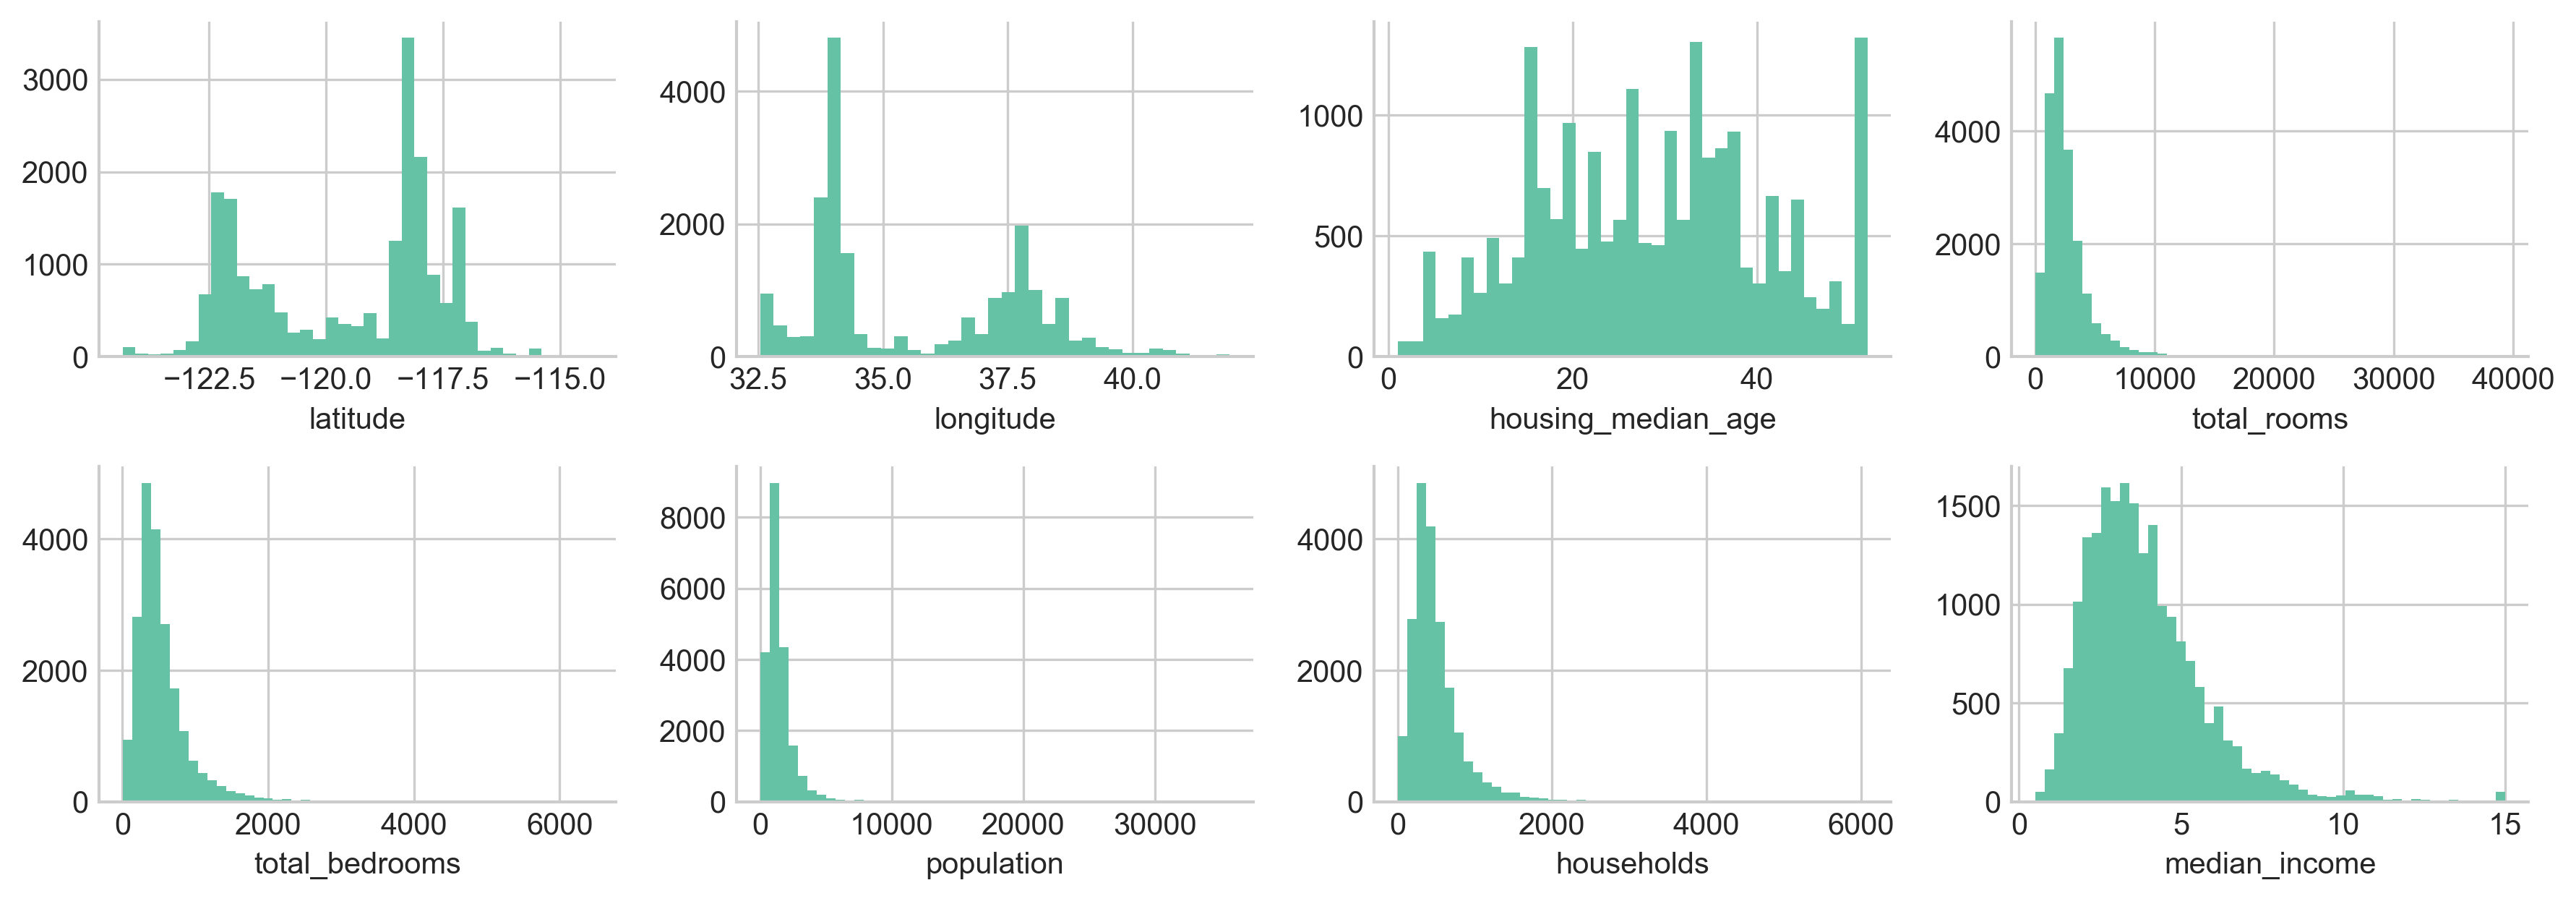

In [7]:
continuous_predictors =['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
dist_plots(train_dataset,continuous_predictors)

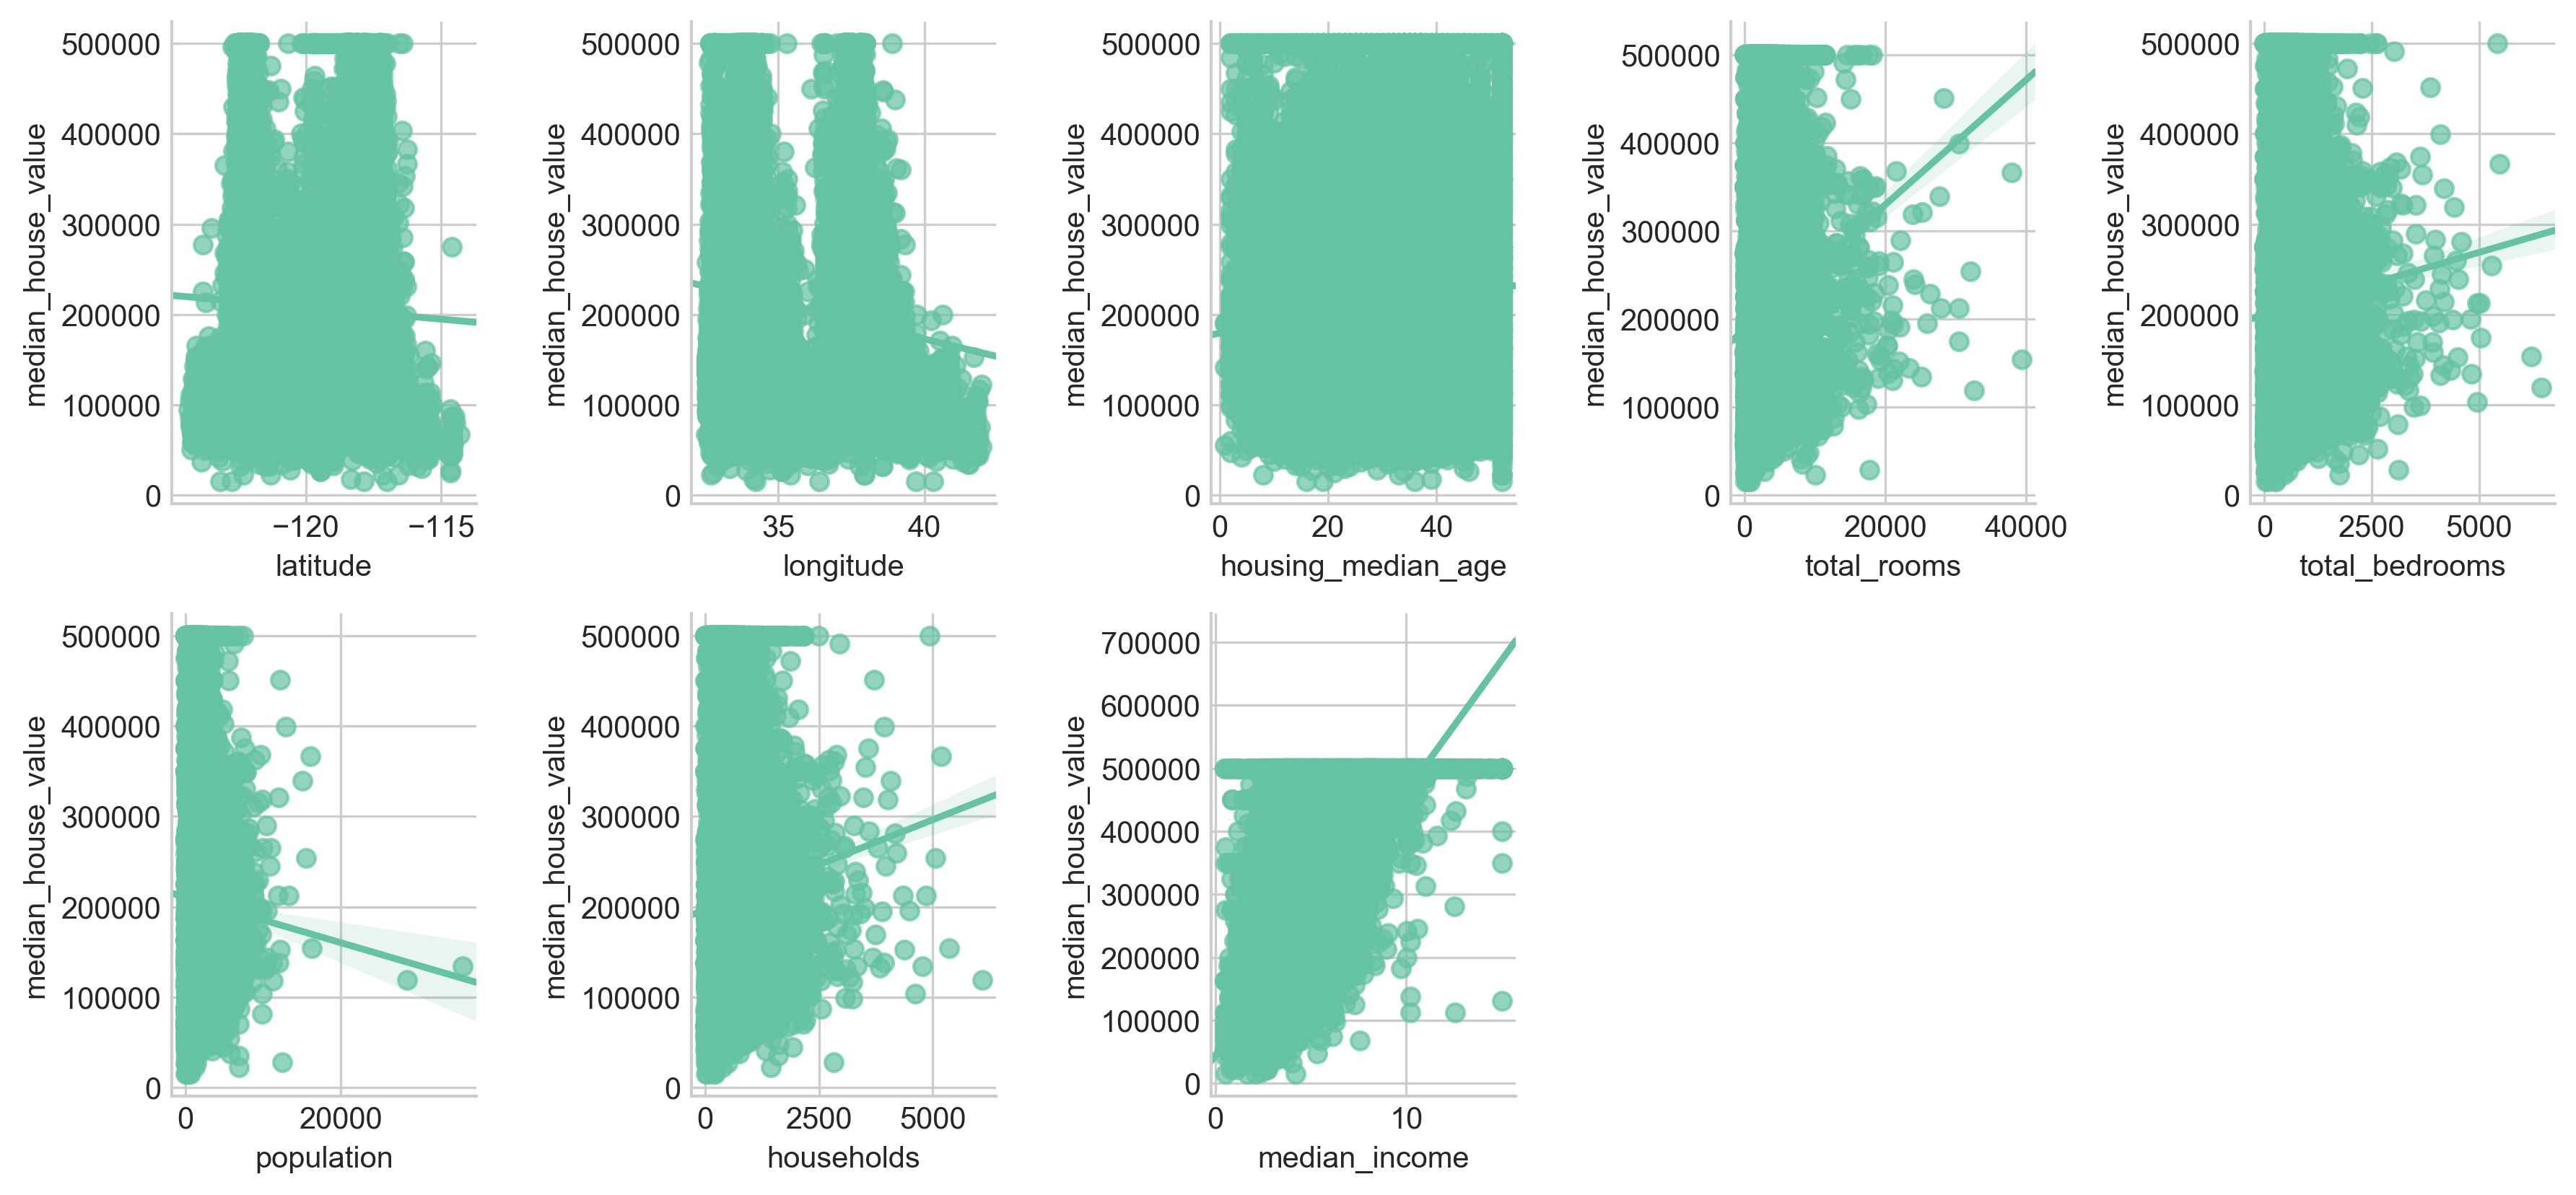

In [8]:
def reg_plots(train_dataset,continuous_features,target_name):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(3,5, i+1)
        
        if continuous_features[i] !=target_name:
            sns.regplot( x=continuous_features[i],y=target_name, data =train_dataset ,ax=ax,
                        scatter_kws={'cmap':'jet',"alpha": 0.7}  )
            sns.despine()
    plt.tight_layout()
    plt.show()
reg_plots(train_dataset,continuous_predictors,response_column[0])

In [9]:

bc_housing_median_age,housing_median_age_lambda  = boxcox(train_dataset['housing_median_age'])
bc_total_rooms,total_rooms_lambda  = boxcox(train_dataset['total_rooms'])
bc_total_bedrooms,total_bedrooms_lambda  = boxcox(train_dataset['total_bedrooms'])
bc_population,population_lambda  = boxcox(train_dataset['population'])
bc_total_households,households_lambda  = boxcox(train_dataset['households'])
bc_median_income,median_income_lambda  = boxcox(train_dataset['median_income'])

In [10]:
print('Optimal lambda value for median age:', housing_median_age_lambda)
train_dataset['bc_housing_median_age'] =bc_housing_median_age
train_dataset['bc_total_rooms'] =bc_total_rooms
train_dataset['bc_total_bedrooms'] =bc_total_bedrooms
train_dataset['bc_population'] =bc_population
train_dataset['bc_households'] =bc_total_households
train_dataset['bc_median_income'] =bc_median_income

Optimal lambda value for median age: 0.809398069296


In [11]:
box_continuous_predictors =['latitude', 'longitude', 'bc_housing_median_age', 'bc_total_rooms', 
                            'bc_total_bedrooms', 'bc_population', 'bc_households', 'bc_median_income']

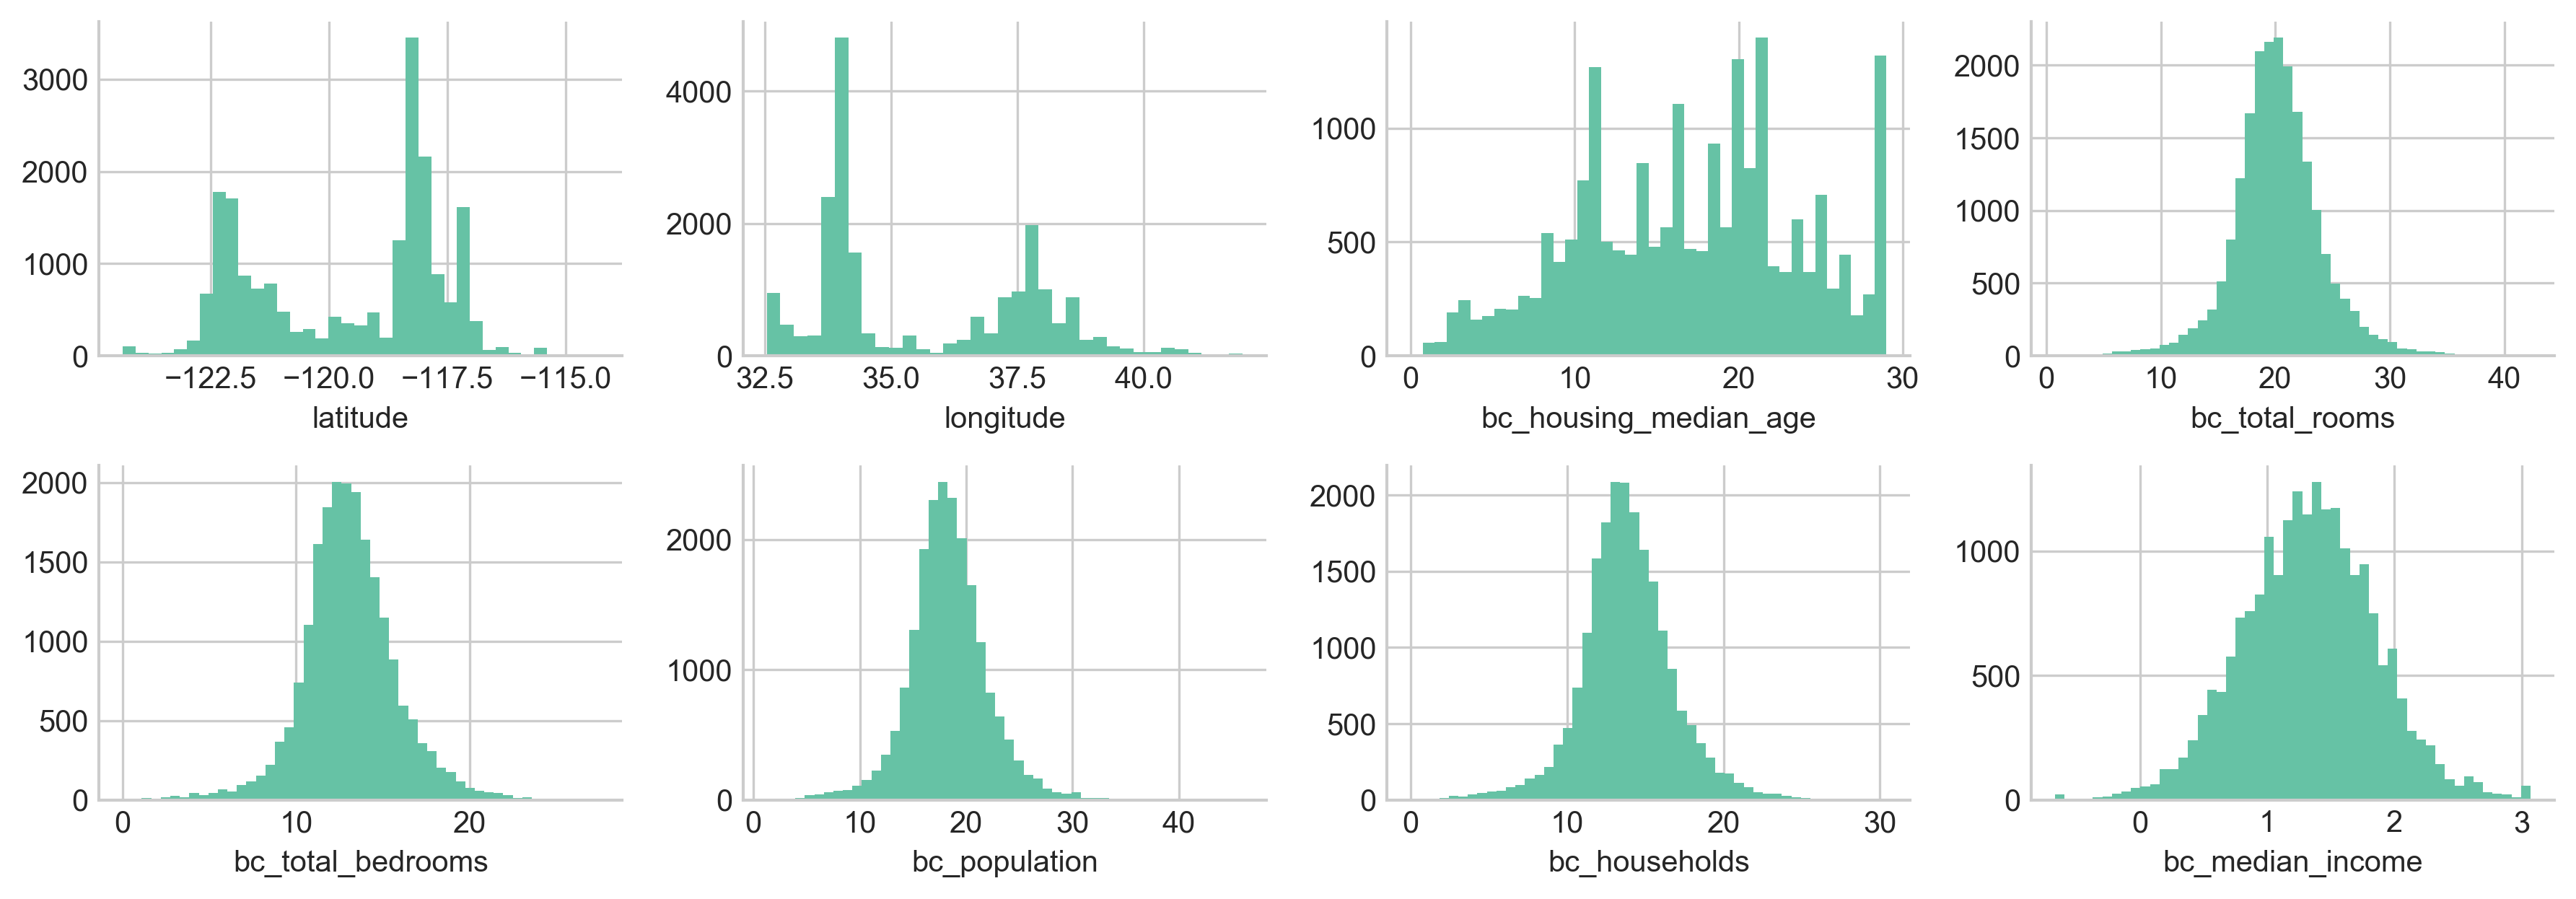

In [12]:
dist_plots(train_dataset,box_continuous_predictors)


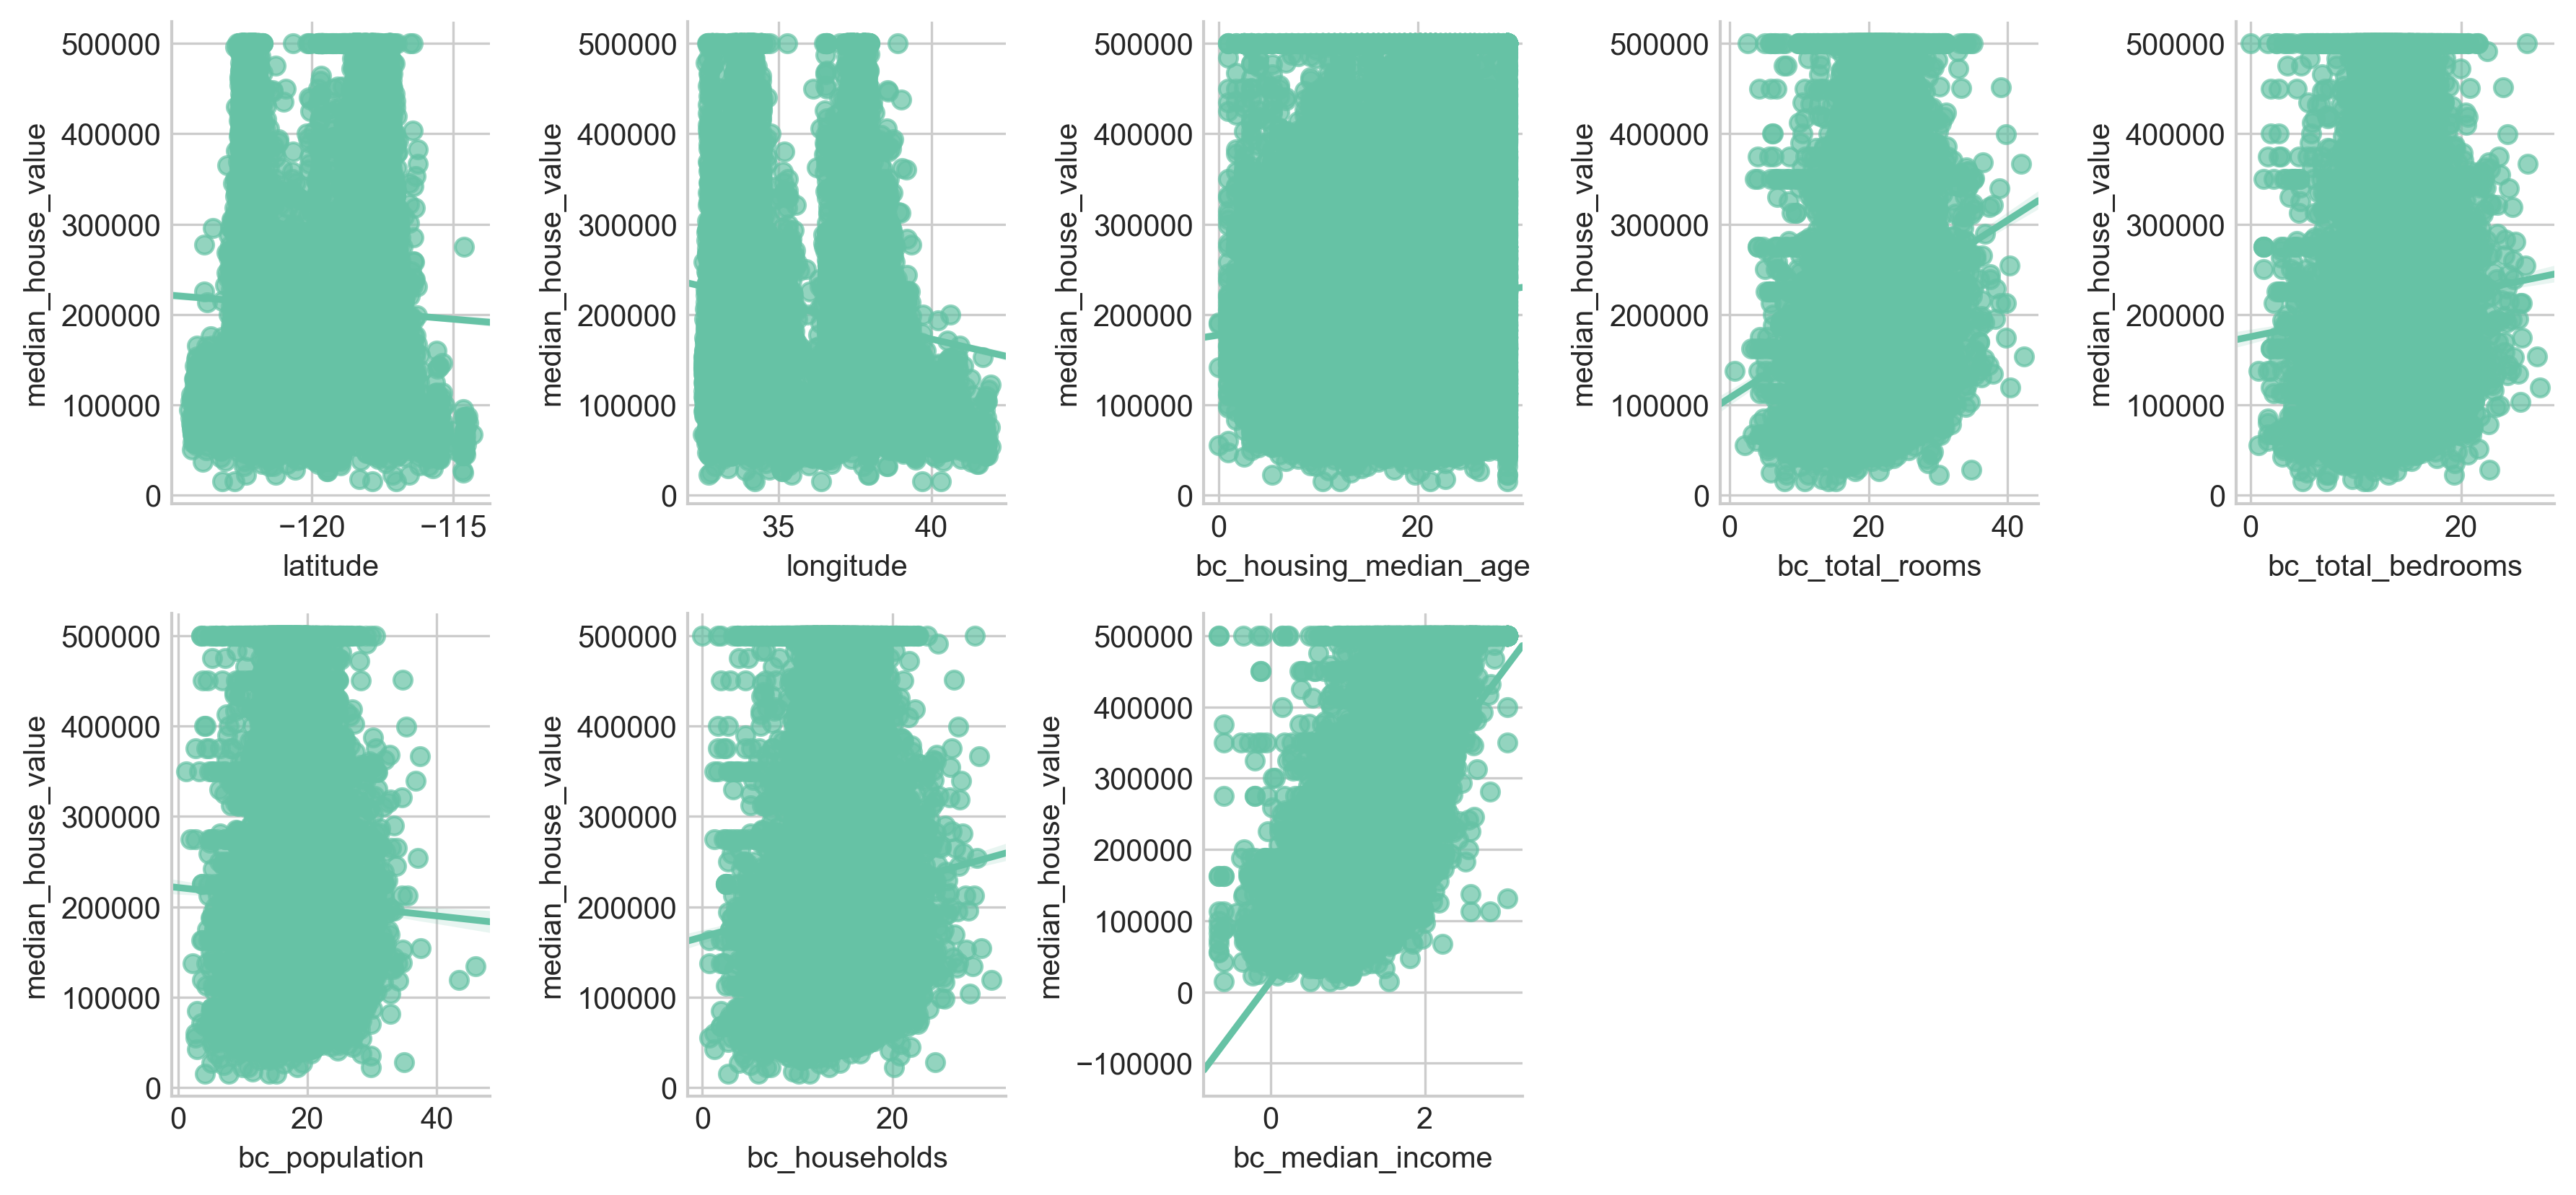

In [13]:
reg_plots(train_dataset,box_continuous_predictors,response_column[0])

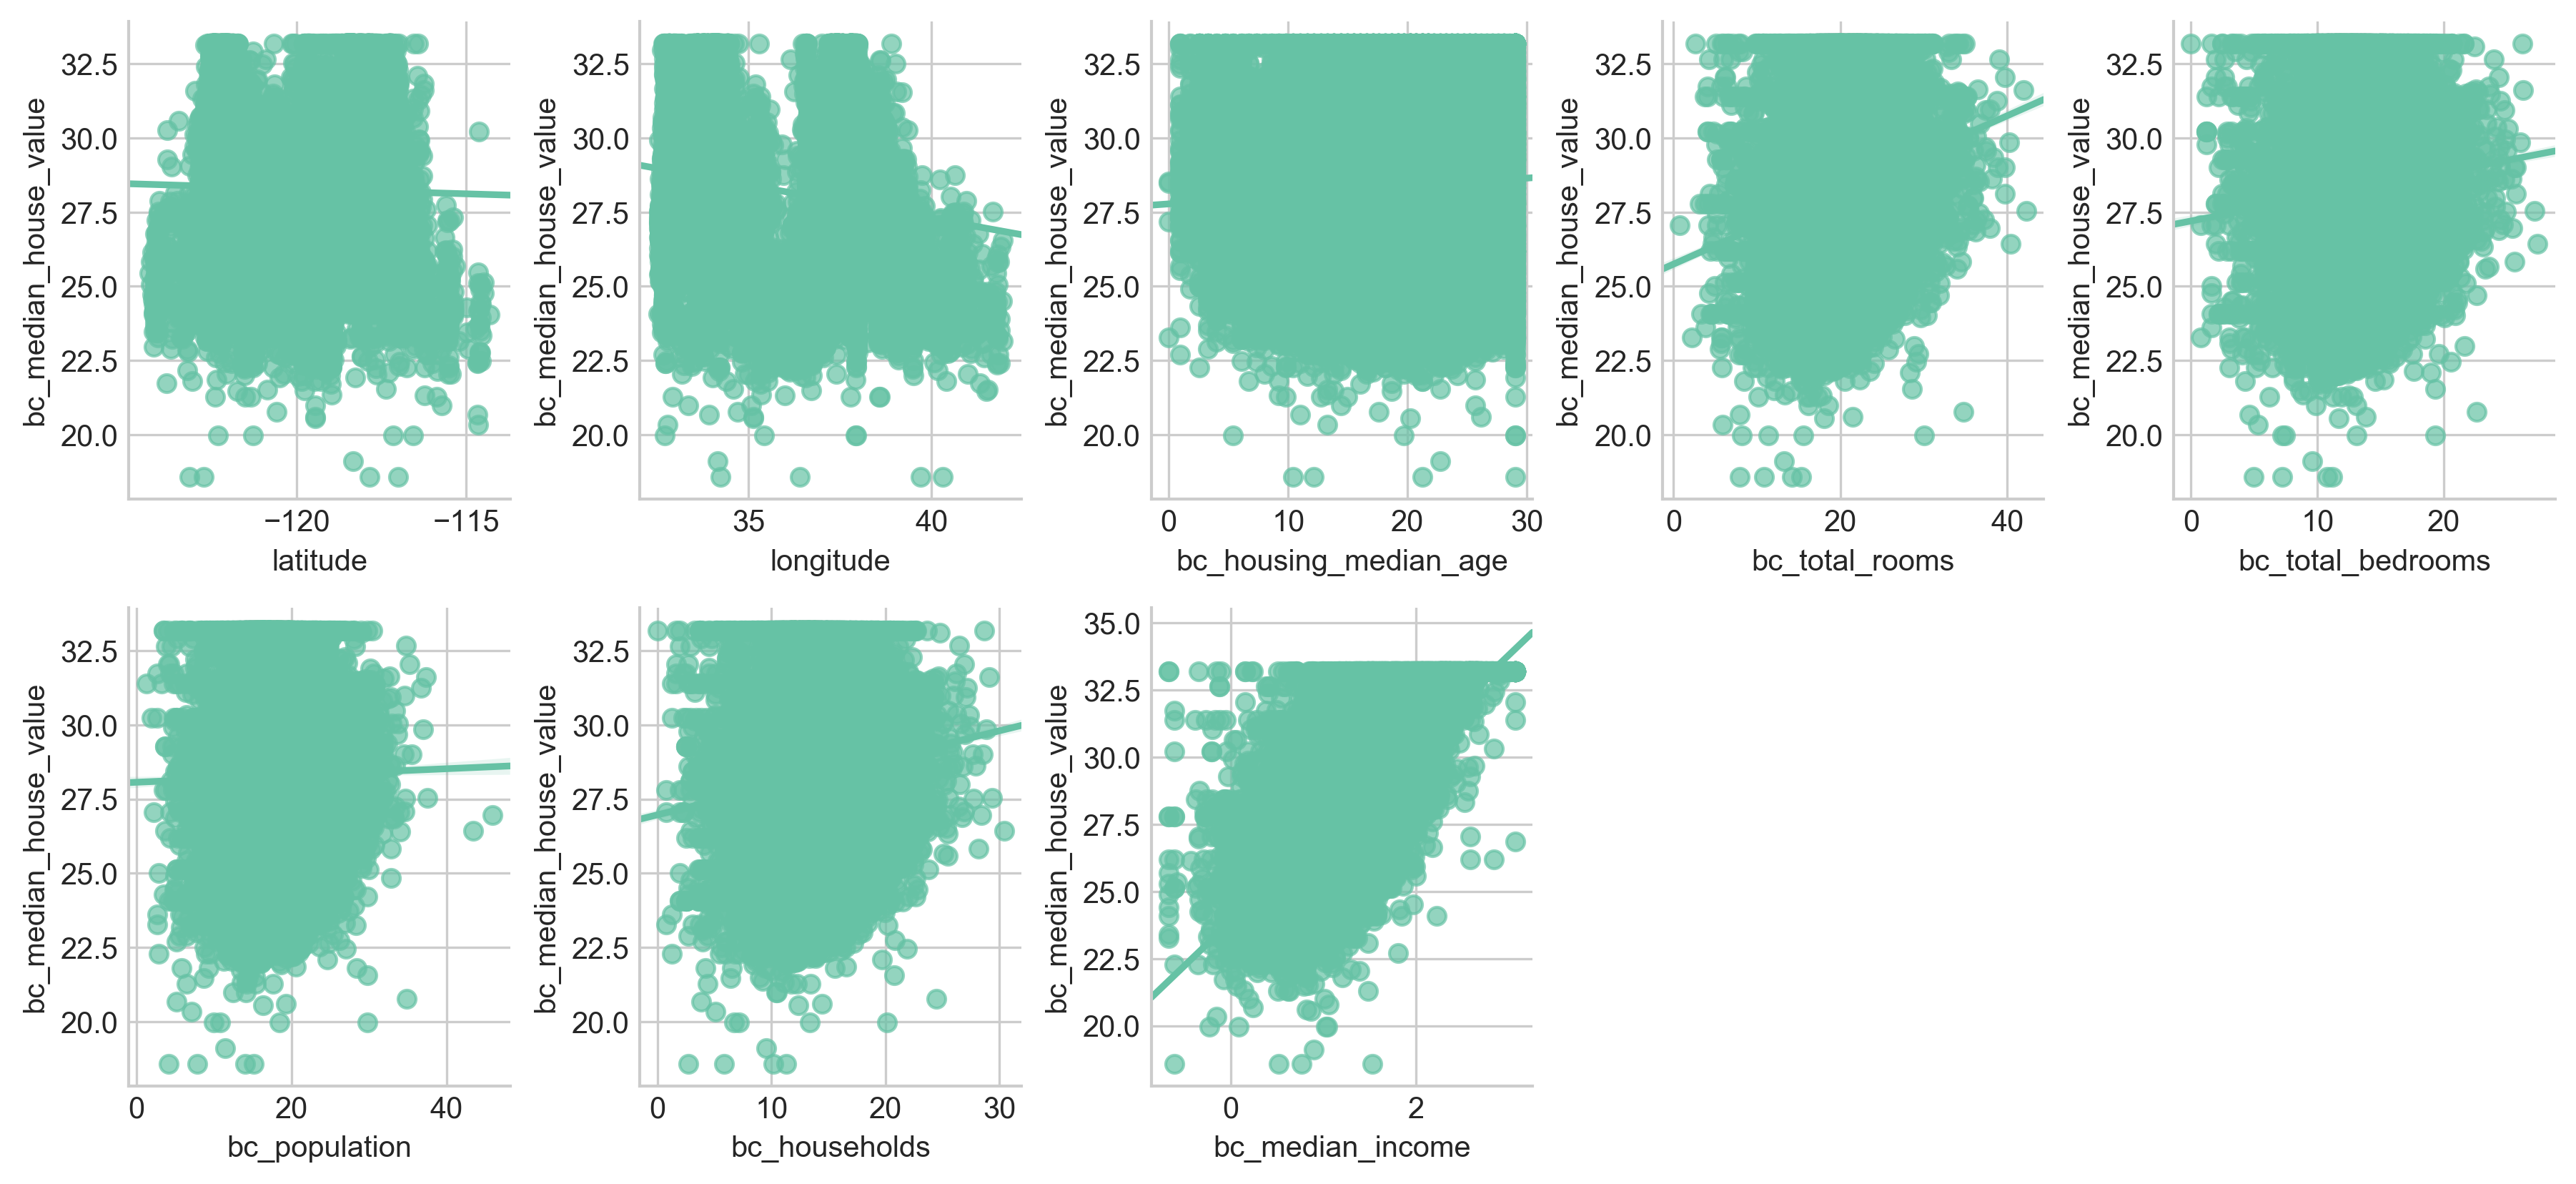

In [14]:
#'bc_median_house_value'
reg_plots(train_dataset,box_continuous_predictors,'bc_median_house_value')

In [39]:
from sklearn.model_selection import train_test_split
#features_to_drop =['latitude', 'longitude']
#features =[feature  for feature in continuous_predictors if feature not in features_to_drop]

features=continuous_predictors
features =box_continuous_predictors
print(features)
X_train,X_test,y_train,y_test = train_test_split(train_dataset[features],train_dataset['bc_median_house_value'])

['latitude', 'longitude', 'bc_housing_median_age', 'bc_total_rooms', 'bc_total_bedrooms', 'bc_population', 'bc_households', 'bc_median_income']


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge ,ElasticNet
lr_scores  = np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))
print("Linear Regression scores:{0}".format(lr_scores))
ridge_scores  = np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))
print("Ridge Regression scores:{0}".format(ridge_scores))
elastic_scores  = np.mean(cross_val_score(ElasticNet(), X_train, y_train, cv=10))
print("ElasticNet Regression scores:{0}".format(elastic_scores))

Linear Regression scores:0.6737980476552818
Ridge Regression scores:0.6737981999093876
ElasticNet Regression scores:0.21506832497894748


In [41]:
#Normalizer has worst performance
from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer
std_scaler = StandardScaler()
std_scaler.fit_transform(X_train)
X_train_std =std_scaler.transform(X_train)
X_test_std =std_scaler.transform(X_test)

In [42]:
lr_scores  = np.mean(cross_val_score(LinearRegression(), X_train_std, y_train, cv=10))
print("Linear Regression scores:{0}".format(lr_scores))
ridge_scores  = np.mean(cross_val_score(Ridge(), X_train_std, y_train, cv=10))
print("Ridge Regression scores:{0}".format(ridge_scores))
elastic_scores  = np.mean(cross_val_score(ElasticNet(), X_train_std, y_train, cv=10))
print("ElasticNet Regression scores:{0}".format(elastic_scores))

Linear Regression scores:0.6737980476552818
Ridge Regression scores:0.6737983156074481
ElasticNet Regression scores:0.33059604268696174


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha' :np.logspace(-4,4,5)}

def create_grid_fit(X,y,model,params):
    grid = GridSearchCV(model,params, cv=10, return_train_score=True, iid=False)
    grid.fit(X,y)
    return grid

ridge_grid = create_grid_fit(X_train_std,y_train,Ridge(),param_grid)
ridge_results = pd.DataFrame(ridge_grid.cv_results_)

Best score: 0.674
Best parameters set:
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 1.0}
0.673798315607
8


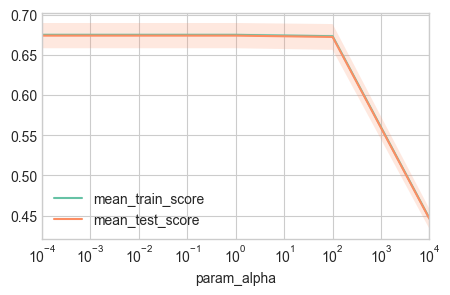

In [44]:
def plot_results(results):
    fig = plt.figure(figsize=(5, 3),dpi=100)
    results.plot('param_alpha', 'mean_train_score',ax=fig.gca())
    results.plot('param_alpha', 'mean_test_score', ax=fig.gca())
    plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
    plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
    plt.legend()
    plt.xscale("log")

def print_model_details(model,results):
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:")
    print(model.best_estimator_)
    print(model.best_params_)
    print(model.best_score_)
    print((model.best_estimator_.coef_!= 0).sum())
    plot_results(results)

print_model_details(ridge_grid,ridge_results)


In [31]:
from sklearn.linear_model import Lasso, RidgeCV, LassoCV
param_grid = {'alpha' :np.logspace(-5,5,15)}
lasso = Lasso(normalize=True, max_iter=1e6)
lasso_grid = create_grid_fit(X_train_std,y_train,lasso,param_grid)
lasso_grid_results = pd.DataFrame(lasso_grid.cv_results_)
lasso_grid_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0999,0.0015,0.6760,0.6769,1e-05,{'alpha': 1e-05},1,0.6758,0.6769,0.6746,...,0.6972,0.6745,0.6697,0.6775,0.6762,0.6768,0.0225,0.0005,0.0094,0.0010
1,0.0802,0.0016,0.6754,0.6763,5.179e-05,{'alpha': 5.17947467923e-05},2,0.6755,0.6763,0.6733,...,0.6961,0.6739,0.6688,0.6769,0.6755,0.6762,0.0039,0.0004,0.0091,0.0010
2,0.0719,0.0019,0.6624,0.6632,0.0002683,{'alpha': 0.000268269579528},3,0.6631,0.6630,0.6564,...,0.6799,0.6605,0.6554,0.6643,0.6617,0.6632,0.0066,0.0006,0.0084,0.0011
3,0.0396,0.0020,0.5131,0.5141,0.001389,{'alpha': 0.00138949549437},4,0.5181,0.5127,0.4919,...,0.5151,0.5121,0.5179,0.5153,0.5136,0.5146,0.0119,0.0004,0.0125,0.0016
4,0.0124,0.0018,0.3505,0.3511,0.007197,{'alpha': 0.00719685673001},5,0.3501,0.3491,0.3408,...,0.3553,0.3505,0.3570,0.3514,0.3567,0.3503,0.0003,0.0003,0.0068,0.0018


Best score: 0.676
Best parameters set:
Lasso(alpha=1.0000000000000001e-05, copy_X=True, fit_intercept=True,
   max_iter=1000000.0, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 1.0000000000000001e-05}
0.676035248097
8


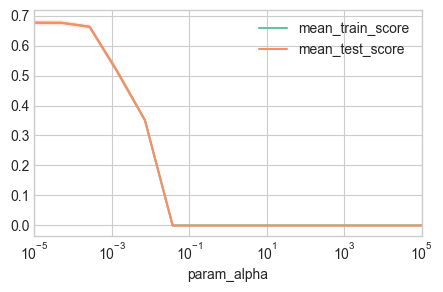

In [37]:
print_model_details(lasso_grid,lasso_grid_results)


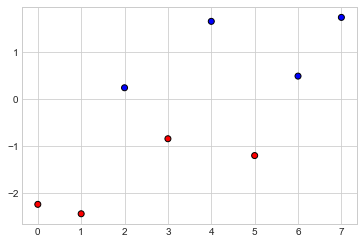

In [38]:
lasso_best = lasso_grid.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso_best.coef_, c=np.sign(lasso_best.coef_), cmap="bwr_r", edgecolor='k')
plt.show()

In [33]:
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.logspace(-4, 4, 5),
              'l1_ratio': [0.01, .1, .5, .9, .98]}
elastic_net = ElasticNet(normalize=True, max_iter=1e6)
elastic_net_grid = create_grid_fit(X_train_std,y_train,elastic_net,param_grid)
elastic_net_results = pd.DataFrame(elastic_net_grid.cv_results_)
elastic_net_results.head()


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0175,0.0020,0.3547,0.3555,0.0001,0.01,"{'alpha': 0.0001, 'l1_ratio': 0.01}",5,0.3563,0.3544,...,0.3594,0.3550,0.3548,0.3564,0.3546,0.3560,0.0026,0.0004,0.0064,0.0011
1,0.0160,0.0018,0.3692,0.3700,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",4,0.3707,0.3689,...,0.3740,0.3695,0.3694,0.3708,0.3691,0.3705,0.0005,0.0004,0.0066,0.0011
2,0.0142,0.0017,0.4506,0.4514,0.0001,0.5,"{'alpha': 0.0001, 'l1_ratio': 0.5}",3,0.4520,0.4503,...,0.4562,0.4507,0.4510,0.4521,0.4498,0.4519,0.0016,0.0004,0.0077,0.0011
3,0.0190,0.0017,0.5887,0.5894,0.0001,0.9,"{'alpha': 0.0001, 'l1_ratio': 0.9}",2,0.5899,0.5887,...,0.5971,0.5878,0.5875,0.5901,0.5868,0.5898,0.0041,0.0004,0.0091,0.0010
4,0.0484,0.0020,0.6543,0.6550,0.0001,0.98,"{'alpha': 0.0001, 'l1_ratio': 0.98}",1,0.6540,0.6548,...,0.6693,0.6527,0.6497,0.6557,0.6539,0.6550,0.0214,0.0017,0.0085,0.0010


Best score: 0.654
Best parameters set:
ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.98,
      max_iter=1000000.0, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0001, 'l1_ratio': 0.98}
0.654275362098
8


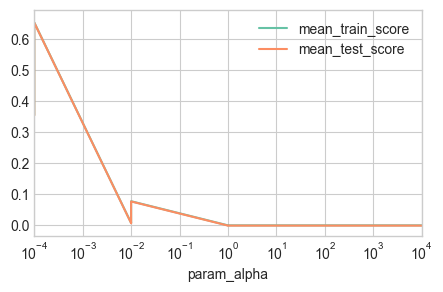

In [34]:
print_model_details(elastic_net_grid,elastic_net_results)

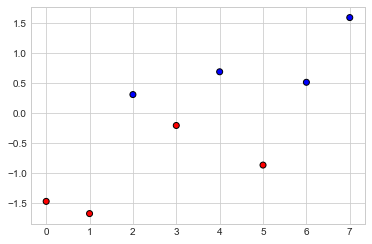

In [35]:
elastic_best = elastic_net_grid.best_estimator_
plt.scatter(range(X_train.shape[1]), elastic_best.coef_, c=np.sign(elastic_best.coef_), cmap="bwr_r", edgecolor='k')